Decision Tree from Scratch (Python)


In [ ]:
# necessary installs
!pip install dtreeplt

In [1]:
# necessary imports
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from dtreeplt import dtreeplt

In [3]:
"""
### Decision Tree class ###
Decision trees are one way to display an algorithm that only contains conditional control statements,
commonly used in operations research, specifically in decision analysis, to help identify a strategy
most likely to reach a goal, but are also a popular tool in machine learning.
"""
class DecisionTree(object): # create a decision tree class 'CART'
    def __init__(self, max_depth, min_splits): # init constructor method
        self.max_depth = max_depth # set the self.max_depth equal to the max_depth value
        self.min_splits = min_splits # set the self.mon_splits equal to _min_splits value
    """
    ### Fit: feature, label ###
    Model fitting is a measure of how well a machine learning model generalizes to similar data to that
    on which it was trained. A model that is well-fitted produces more accurate outcomes. A model that is
    overfitted matches the data too closely. A model that is underfitted doesn't match closely enough.
    """
    def fit(self, feature, label): # fit method
        self.feature = feature # set the self.feature equal to the feature value
        self.label = label # set the self.label equal to the label value
        self.train_data = np.column_stack((self.feature,self.label)) # set the self.train_data with column stack from numpy on the self.feature & self.label
        self.build_tree() # build the tree
    """
    ### Gini Impurity: groups, class labels ###
    Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled
    if it was randomly labeled according to the distribution of labels in the subset.
    """
    def gini(self, groups, class_labels): # compute gini similiarity method
        number_sample = sum([len(group) for group in groups]) # set the num_sample equal to the sum of the length of group in groups
        gini_score = 0 # set the gini_score equal to 0

        for group in groups: # for loop, group in groups
            size = float(len(group)) # set the size equal to the length of group as a float

            if size == 0: # if the size is equal to 0
                continue # continue
            score = 0.0 # set the score equal to 0.0

            for label in class_labels: # for loop, label in class_labels
                porportion = (group[:,-1] == label).sum() / size # set the proprotion equal to the all but the last item in the group labels sum divided by the size
                score += porportion * porportion # add proprotion times proprotion to the score
            gini_score += (1.0 - score) * (size/number_sample) # add 1 minus the score times the size divided by the num_sample

        return gini_score # return the gini_score
    """
    ### Terminal Node: _group ###
    Terminal nodes are the most common class in the group, these are used to make prediction later on.
    """
    def term_node(self, group): # terminal node method
        class_labels, count = np.unique(group[:,-1], return_counts= True) # set a class_labels count equal to the unique count of all class_labels but the last
        return class_labels[np.argmax(count)] # return the class_labels count
    """
    ### Split: index, val, data ###
    Splitting the features into two groups based on values.
    """
    def split(self, index, val, data): # split method
        data_l = np.array([]).reshape(0,self.train_data.shape[1]) # set the data_l equal the reshaped train data array
        data_r = np.array([]).reshape(0, self.train_data.shape[1]) # set the data_r equal the reshaped train data array

        for row in data: # for loop, row in data
            if row[index] <= val:  # if the row index value is less than or equal to the val
                data_l = np.vstack((data_l,row)) # set the data_left equal to the vertial stack of the data_l and row

            if row[index] > val: # if the row index value is greater than the val
                data_r = np.vstack((data_r, row)) # set the data_right equal to the vertial stack of the data_r and row

        return data_l, data_r # return the data_l value and data_r value
    """
    ### best_split: data ###
    Finding the best split using the gini impurity score.
    """
    def best_split(self, data): # best split method
        class_labels = np.unique(data[:,-1]) # set the class_labels equal to all the unique values of data but the last
        best_index = 999 # set the best_index to equal 999
        best_val = 999 # set the best_val to equal 999
        best_score = 999 # set the best_score equal to 999
        best_groups = None # set the best_groups equal to None

        for i in range(data.shape[1]-1): # for loop, i in the range of the data reshaped
            for row in data: # for loop, row in data
                groups = self.split(i, row[i], data) # set groups equal to the split function on i , row[i], and data
                gini_score = self.gini(groups,class_labels) # set the gini_score equal the the gini function on groups and class labels

                if gini_score < best_score: # if gini_score is less than the best_score
                    best_index = i # set the best_index equal to i value
                    best_val = row[i] # set the best_val equal to row[i] value
                    best_score = gini_score # set the best_score equal to gini_score
                    best_groups = groups # set the best_groups equal to groups
        result = {} # create an empty dictionary
        result['index'] = best_index # set the result index equal to the best_index
        result['val'] = best_val # set the result val equal to the best_val
        result['groups'] = best_groups # set the result groups equal to the best_groups
        return result # return the result
    """
    ### split_branch: node, depth ###
    Recursively split the data and check for early stop arguments to create terminal node.
    """
    def split_branch(self, node, depth): # split branch method
        l_node , r_node = node['groups'] # split node groups into l_node and r_node
        del(node['groups']) # deleted the node groups

        if not isinstance(l_node,np.ndarray) or not isinstance(r_node,np.ndarray): # if its not in the left_node or right_node ndoe array
            node['left'] = self.term_node(l_node + r_node) # set the left node equal to the terminal_node on the left_node and the right_node
            node['right'] = self.term_node(l_node + r_node) # set the right node equal to the terminal_node on the left_node and the right_node
            return

        if depth >= self.max_depth: # if the depth is greater than or equal to the max_depth
            node['left'] = self.term_node(l_node) # set the left node equal to the terminal_node on the left_node
            node['right'] = self.term_node(r_node) # set the right node equal to the terminal_node ob the right_node
            return

        if len(l_node) <= self.min_splits: # if the length of the left_node is less than or equal to the min_splits
            node['left'] = self.terminal_node(l_node) # set the left node equal to the terminal_node on the left_node
        else: # else
            node['left'] = self.best_split(l_node) # set the left node equal to the best_split on the left_node
            self.split_branch(node['left'],depth + 1) # split_branch on the left node with depth and 1

        if len(r_node) <= self.min_splits: # if the length of the right is less than or equal to the min_splits
            node['right'] = self.terminal_node(r_node) # set the right node equal to the terminal_node on the right_node
        else:
            node['right'] = self.best_split(r_node) # set the right node equal to the best_split of the right_node
            self.split_branch(node['right'],depth + 1) # split_branch on the right node with depth and 1
    """
    ### tree_builder: ###
    Build tree recursively with best_splt and split_branch.
    """
    def build_tree(self): # build tree method
        self.root = self.best_split(self.train_data) # set the root equal to the best_split on the train_data
        self.split_branch(self.root, 1) # split_branch on the root with 1
        return self.root  # return the root
    """
    ### predict_: node, row ###
    Recursively traverse through the trees to determine the class of unseen sample
    data point during prediction.
    """
    def pred_(self, node, row): # predict method
        if row[node['index']] < node['val']: # if the row node index is less tha nthe node val
            if isinstance(node['left'], dict): # if the node left is dictionary
                return self.pred_(node['left'], row) # return the _predict of the node left and row
            else: # else
                return node['left'] # return the node left

        else: # else
            if isinstance(node['right'],dict): # if the node right is dictionary
                return self.pred_(node['right'],row) # return the _predict of the node right and row
            else: # else
                return node['right'] # return the node right
    """
    ### predict: test_data ###
    Predict the labels of the data
    """
    def pred(self, test_data): # predict method
        self.pred_label = np.array([]) # set the predicted_label to an empty array
        for i in test_data: # for loop, idx in test_data
            self.pred_label = np.append(self.pred_label, self.pred_(self.root,i)) # append the predicted_label and _predict of the root with idx to the predicted_label

        return self.pred_label # return the predicted_label


In [4]:
"""
Accuracy score function, computes raw accuaracy scores.
"""
def acc_score(pred, act): # accuracy score funtion
    correct = 0 # set the correct equal to 0
    pred_len = len(pred) # set the pred_len equal to the length of the pred input
    for i in range(pred_len): # for loop, i in range of the pred_len
        if int(pred[i]) == act[i]: # if the pred value is eqaul to the actual value
            correct += 1 # add 1 to the correct
    return correct/pred_len # return the correct divded by the pred_len
"""
Model function, loads data and computes decision trees.
"""
def models(): # models function
    iris = load_iris() # load the sklearn iris data set
    feature = iris.data[:,:2] # set the features of the data
    label = iris.target # set the label as the target
    X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state= 42) # split the data into train and test
    """
    ### Created Decision Tree Model ###
    """
    scratch_dt_model =  DecisionTree(max_depth = 2, # create our decision tree model with params
                                min_splits = 10)
    scratch_dt_model.fit(X_train, y_train) # fit the model
    scratch_dt_model_pred = scratch_dt_model.pred(X_test) # create predicitons from the model
    """
    ### Sklearn Decision Tree Model ###
    """
    sk_dt_model = DecisionTreeClassifier(max_depth= 2, # use the decision tree model from Sklearn with params
                                         min_samples_split= 10)
    sk_dt_model.fit(X_train, y_train) # fit the model
    sk_dt_model_pred = sk_dt_model.predict(X_test) # create predicitons from the model
    """
    ### Results ###
    """
    print("Scratch Model Accuracy : {0}".format(acc_score(scratch_dt_model_pred, y_test))) # print the scratch models accuracy score
    print("SK-Learn Model Accuracy : {0}".format(acc_score(sk_dt_model_pred, y_test))) # print the sklearn models accuracy score
    print(list(zip(scratch_dt_model_pred, sk_dt_model_pred, y_test))) # print the scratch models prediction, sklearn models prediction, and the actual value

if  __name__ == "__main__":
    models()


Scratch Model Accuracy : 0.7368421052631579
SK-Learn Model Accuracy : 0.7631578947368421
[(2.0, 1, 1), (1.0, 1, 0), (2.0, 2, 2), (1.0, 1, 1), (2.0, 2, 1), (1.0, 0, 0), (1.0, 1, 1), (2.0, 2, 2), (2.0, 2, 1), (1.0, 1, 1), (2.0, 2, 2), (0.0, 0, 0), (1.0, 1, 0), (0.0, 0, 0), (0.0, 0, 0), (2.0, 2, 1), (2.0, 2, 2), (1.0, 1, 1), (1.0, 1, 1), (2.0, 2, 2), (0.0, 0, 0), (2.0, 1, 2), (0.0, 0, 0), (2.0, 2, 2), (2.0, 2, 2), (2.0, 2, 2), (2.0, 2, 2), (2.0, 2, 2), (0.0, 0, 0), (0.0, 0, 0), (0.0, 0, 0), (1.0, 1, 0), (2.0, 2, 1), (0.0, 0, 0), (0.0, 0, 0), (2.0, 2, 2), (2.0, 2, 1), (0.0, 0, 0)]


Use Iris Datasets.
Use Iris Datasets.
Scratch Model Accuracy : 0.7368421052631579
[(2.0, 1), (1.0, 0), (2.0, 2), (1.0, 1), (2.0, 1), (1.0, 0), (1.0, 1), (2.0, 2), (2.0, 1), (1.0, 1), (2.0, 2), (0.0, 0), (1.0, 0), (0.0, 0), (0.0, 0), (2.0, 1), (2.0, 2), (1.0, 1), (1.0, 1), (2.0, 2), (0.0, 0), (2.0, 2), (0.0, 0), (2.0, 2), (2.0, 2), (2.0, 2), (2.0, 2), (2.0, 2), (0.0, 0), (0.0, 0), (0.0, 0), (1.0, 0), (2.0, 1), (0.0, 0), (0.0, 0), (2.0, 2), (2.0, 1), (0.0, 0)]


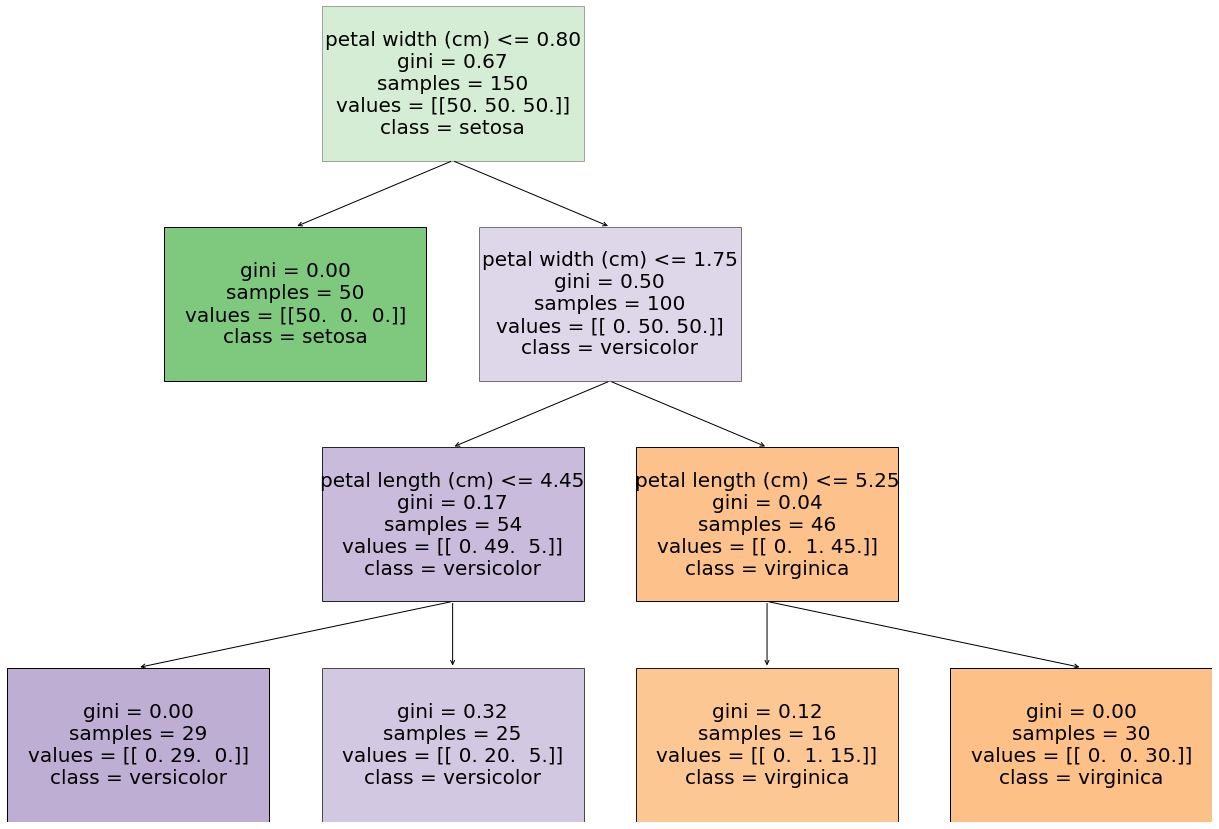

In [6]:
"""
### Created Decision Tree Model ###
"""
dtree = dtreeplt() # set dtree with dtreeplt()
dtree.view() # set the .vew()
dtree.view(interactive=True) # set the .view to interactive

iris = load_iris() # load the sklearn iris data set
feature = iris.data[:,:2] # set the features of the data
label = iris.target # set the label as the target
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state= 42) # split the data into train and test

# Fit the classifier with default hyper-parameters
scratch_tree_model =  DecisionTree(max_depth = 2, min_splits = 10) # create our decision tree model with params
scratch_model = scratch_tree_model.fit(X_train, y_train)
scratch_tree_model_pred = scratch_tree_model.pred(X_test) # create predicitons from the decision tree model

dtree = dtreeplt( # add the detree parameters
    model=scratch_model, # set the model to the created model 
    feature_names=iris.feature_names, # set the feature names to the iris data feature names 
    target_names=iris.target_names, # set the target names to the iris data target names
)

print("Scratch Model Accuracy : {0}".format(acc_score(scratch_tree_model_pred, y_test))) # show the created models accuracy score
print(list(zip(scratch_tree_model_pred, y_test))) # show the created models predictions vs the y_test data
fig = dtree.view() # display the dtree
#if you want save figure, use savefig method in returned figure object.
#fig.savefig('output.png')

Use Iris Datasets.
SK-Learn Model Accuracy : 0.7631578947368421
[(1, 1), (1, 0), (2, 2), (1, 1), (2, 1), (0, 0), (1, 1), (2, 2), (2, 1), (1, 1), (2, 2), (0, 0), (1, 0), (0, 0), (0, 0), (2, 1), (2, 2), (1, 1), (1, 1), (2, 2), (0, 0), (1, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (0, 0), (1, 0), (2, 1), (0, 0), (0, 0), (2, 2), (2, 1), (0, 0)]


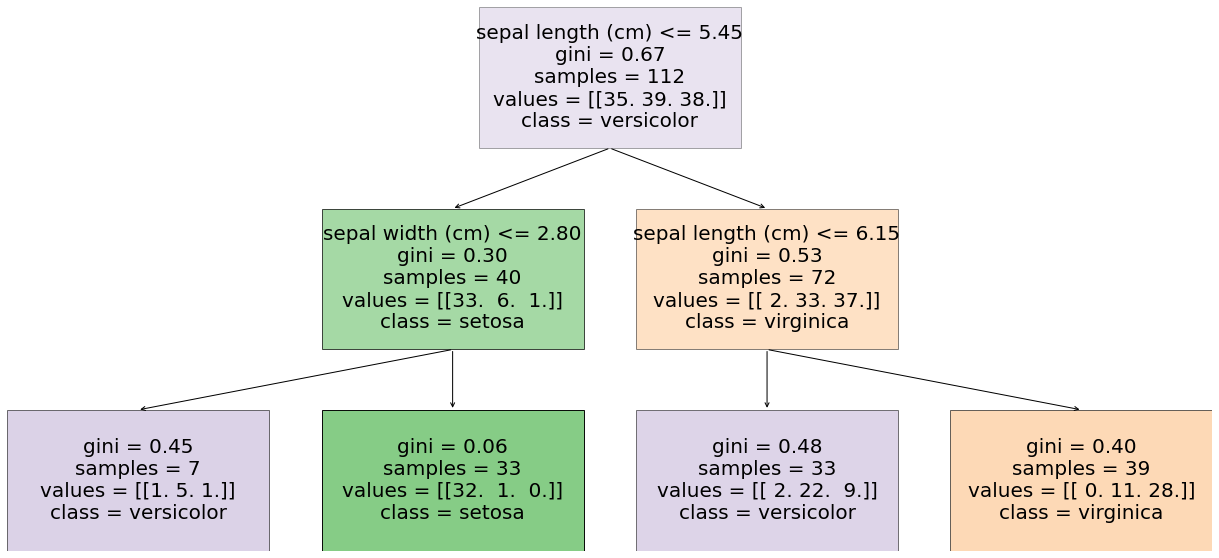

In [8]:
"""
### SKlearn Decision Tree Model ###
"""
dtree = dtreeplt() # set dtree with dtreeplt()
dtree.view() # set the .vew()
dtree.view(interactive=True) # set the .view to interactive

iris = load_iris() # load the sklearn iris data set
feature = iris.data[:,:2] # set the features of the data
label = iris.target # set the label as the target
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state= 42) # split the data into train and test
sk_dt_model = DecisionTreeClassifier(max_depth = 2, min_samples_split = 10) # use the decision tree model from Sklearn with params
sk_model = sk_dt_model.fit(X_train, y_train) # fit the decision tree model
sk_dt_model_pred = sk_dt_model.predict(X_test) # create predicitons from the decision tree model

dtree = dtreeplt( # add the detree parameters
    model=sk_model, # set the model to the created model 
    feature_names=iris.feature_names, # set the feature names to the iris data feature names 
    target_names=iris.target_names, # set the target names to the iris data target names
)

print("SK-Learn Model Accuracy : {0}".format(acc_score(sk_dt_model_pred, y_test))) # print the sklearn models accuracy score
print(list(zip(sk_dt_model_pred, y_test))) # show the created models predictions vs the y_test data
fig = dtree.view() # display the dtree
#if you want save figure, use savefig method in returned figure object.
#fig.savefig('output.png')